## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score

In [2]:
df=pd.read_csv("Churn Modeling.csv")
# Reading dataset

In [3]:
df
# loading dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Understanding

In [4]:
df.shape
# There are 10,000 rows and 14 columns

(10000, 14)

In [5]:
df.info()
# Checking the information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()
# There are no null values in the dataset

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Exited'].value_counts()
# As it can be seen this dataset's targer column is imbalanced there are 7963 zero's and 2037 one's

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df.describe()
# The describe function will display all the decriptive statistics of the data including mean, std, min, max values.

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.nunique()
# The nunique() function is used to count distinct observations over requested axis. Return Series with number of distinct observations.

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [10]:
df.columns
# Displaying the column names of the dataset.

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Data Visualization

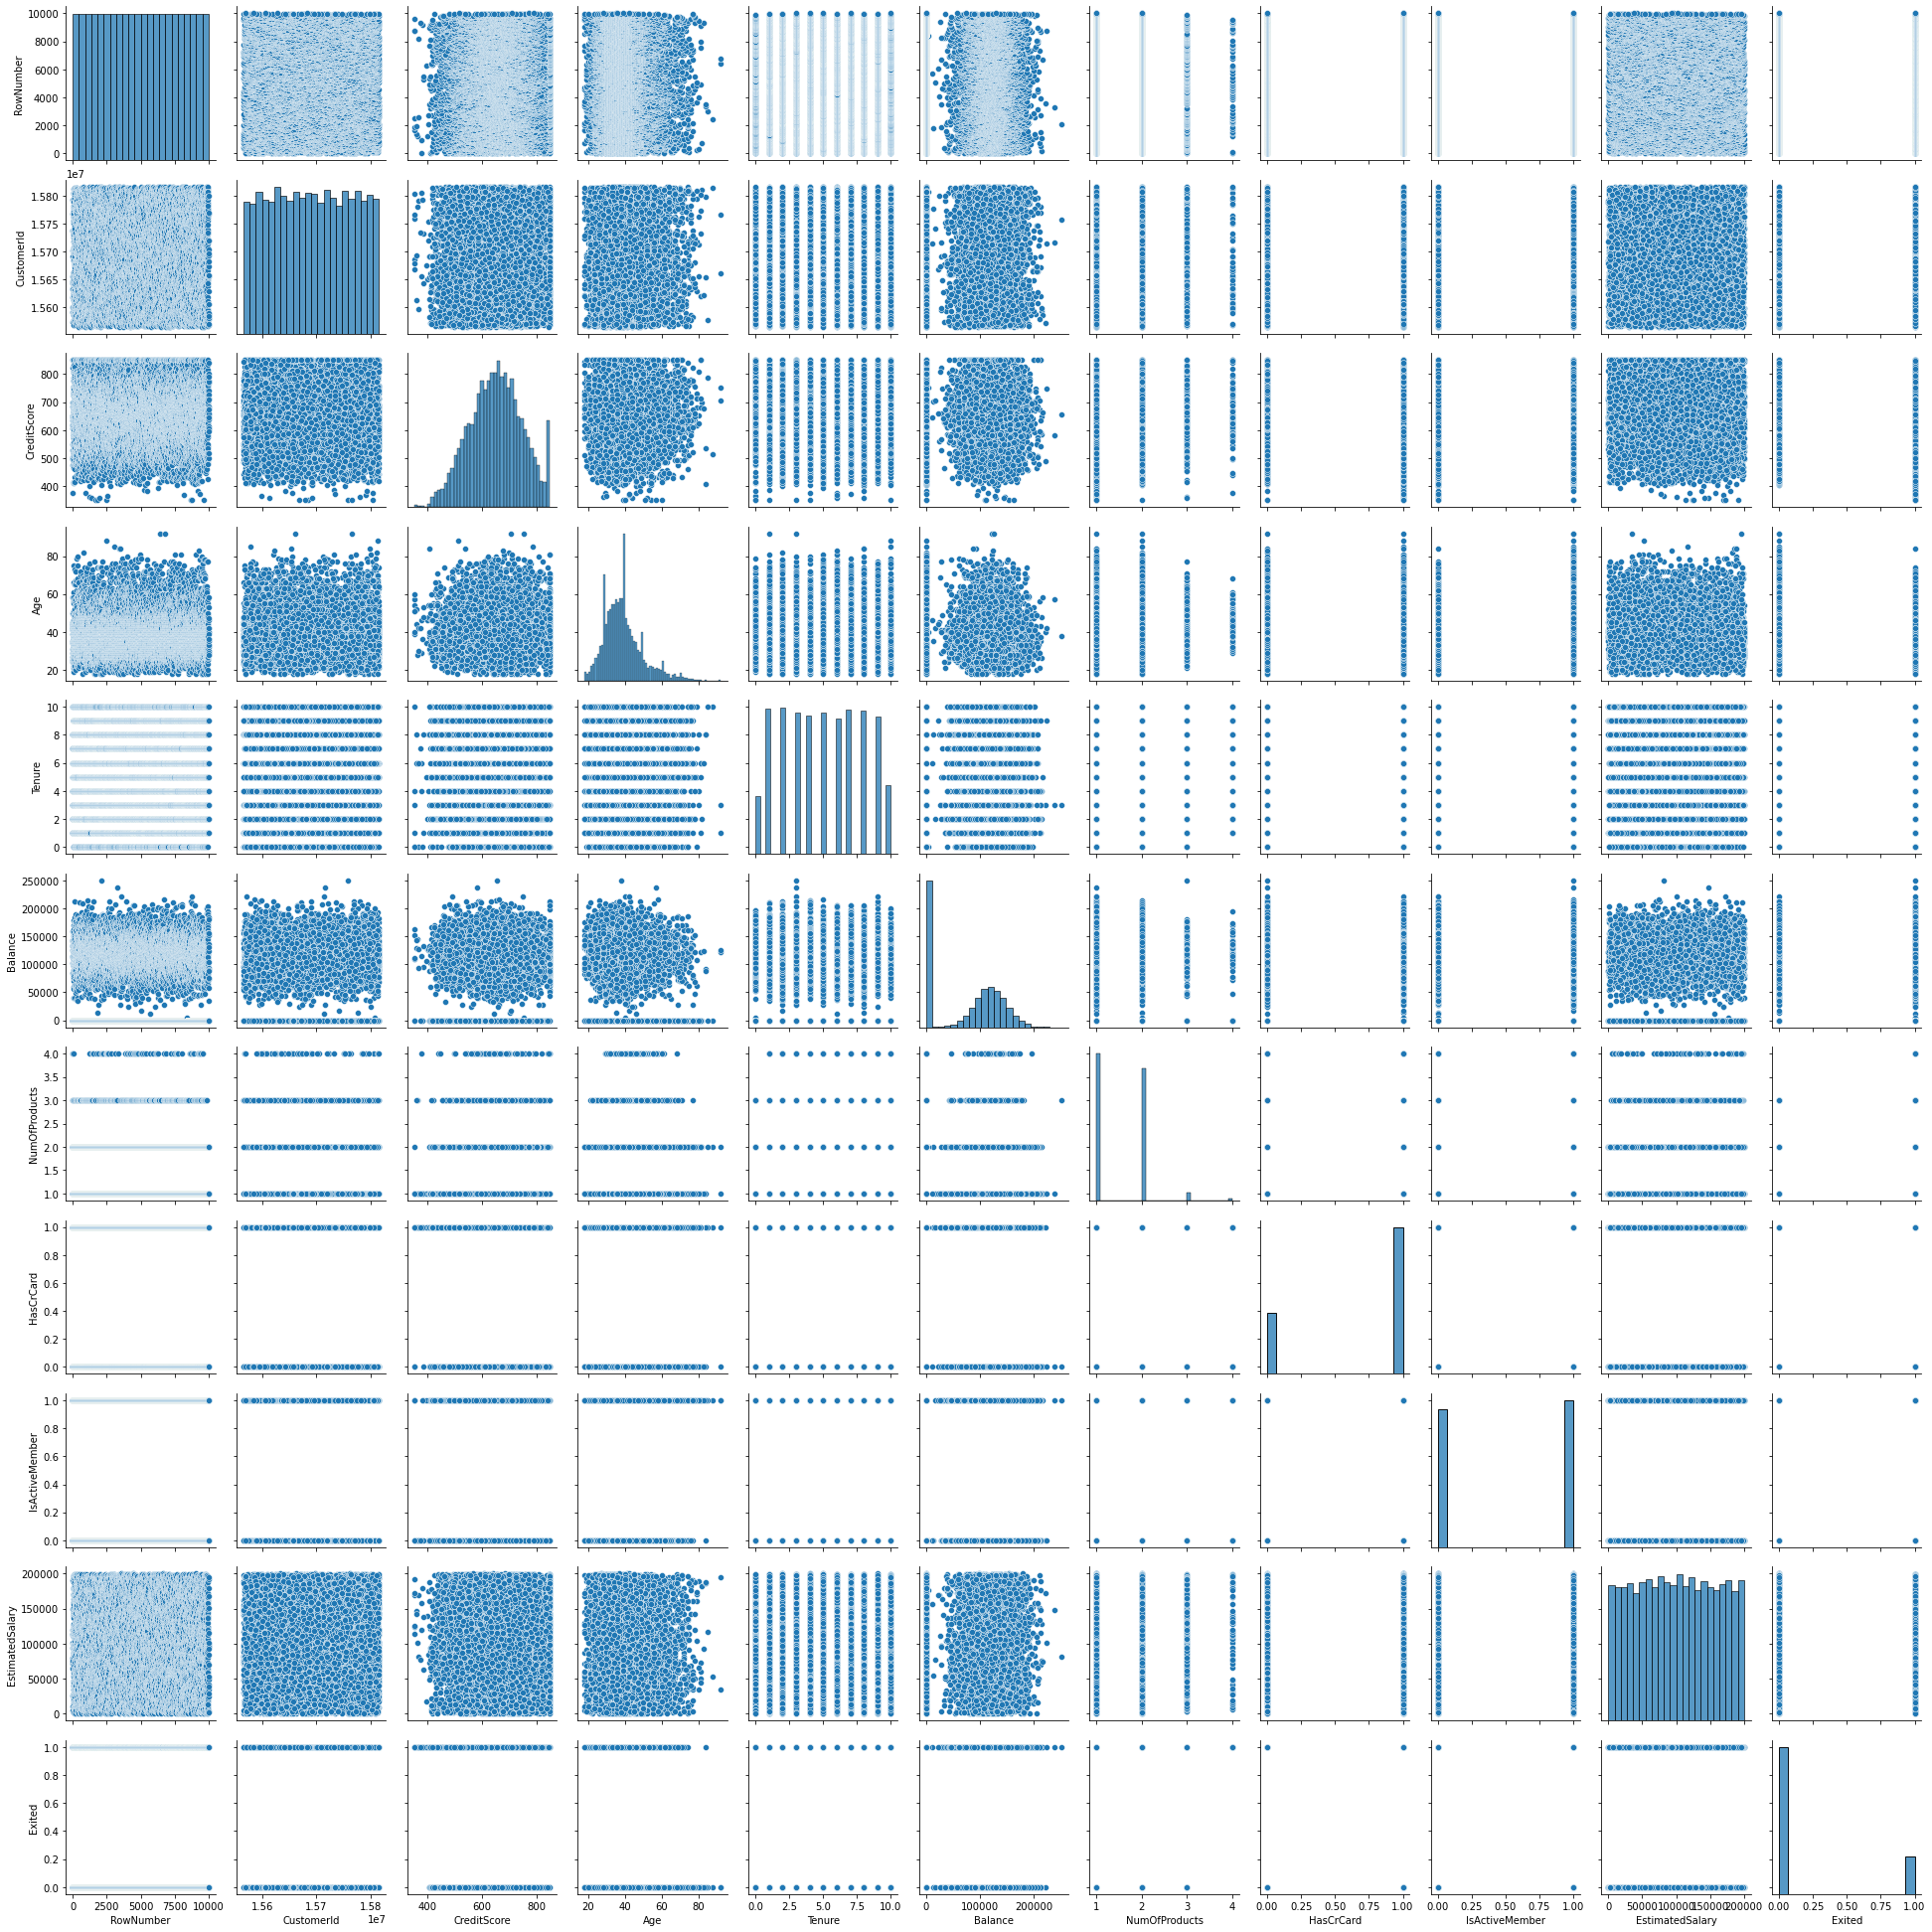

In [11]:
sns.pairplot(data=df)
# Displaying scatter plots

In [12]:
df.columns
# Displaying column names

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [13]:
df.head(5)
# Displaying the head of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


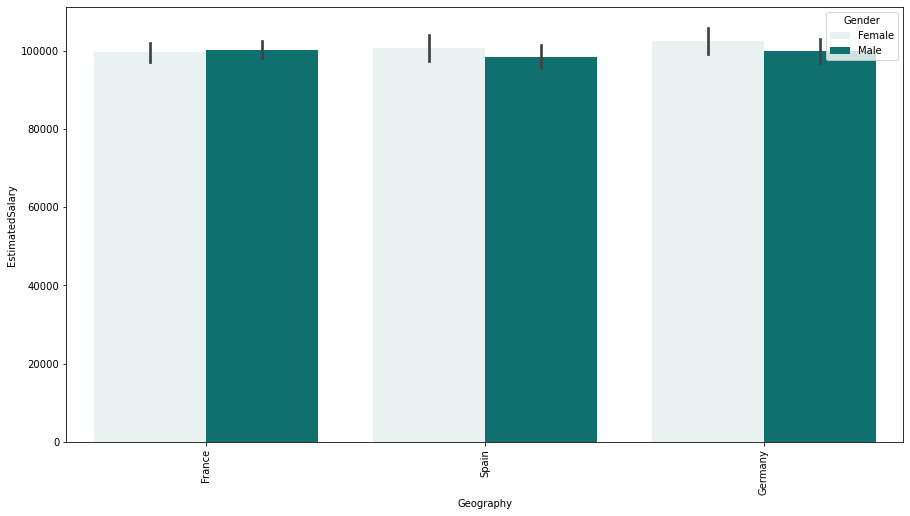

In [14]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Geography',y='EstimatedSalary',hue='Gender',color='teal',data=df);
# Visualizing barplot where Geography is on x-axis and estimated salary is on y axis and key is gender

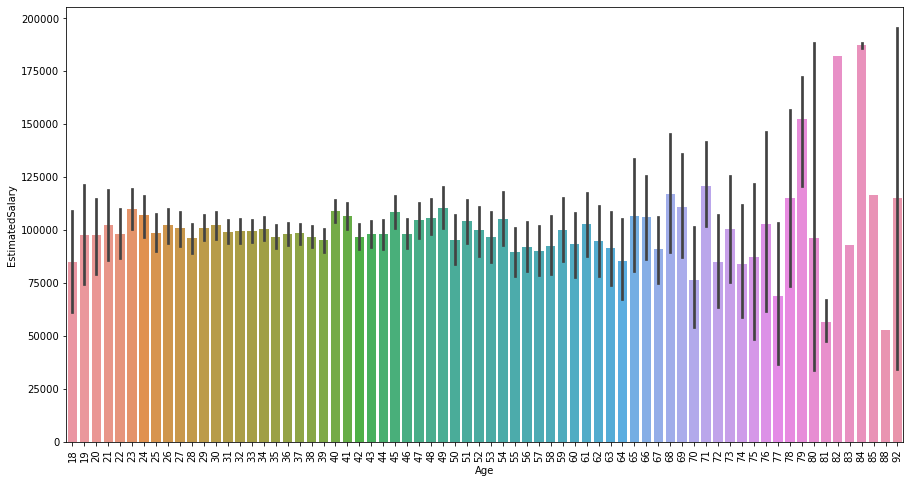

In [15]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='EstimatedSalary',data=df);
# Visualizing barplot where age is taken on x axis and estimated salary is taken on y axis

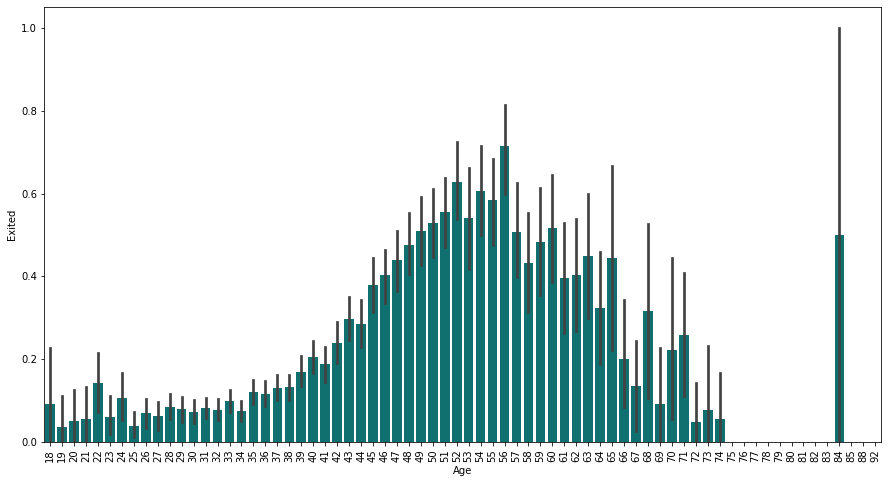

In [16]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='Exited',color='teal',data=df);
# Visualizing barplot where age is taken on x axis and exited in on y axis

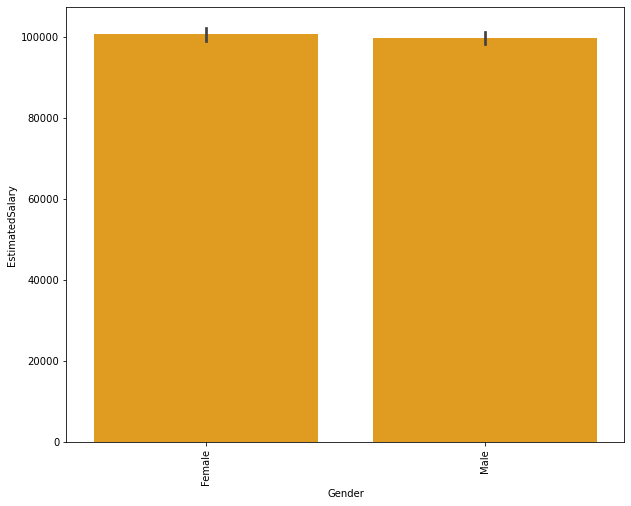

In [17]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.barplot(x='Gender',y='EstimatedSalary',color='orange',data=df);
# Visualizing barplot where gender is taken on x axis and estimated salary is taken on y axis

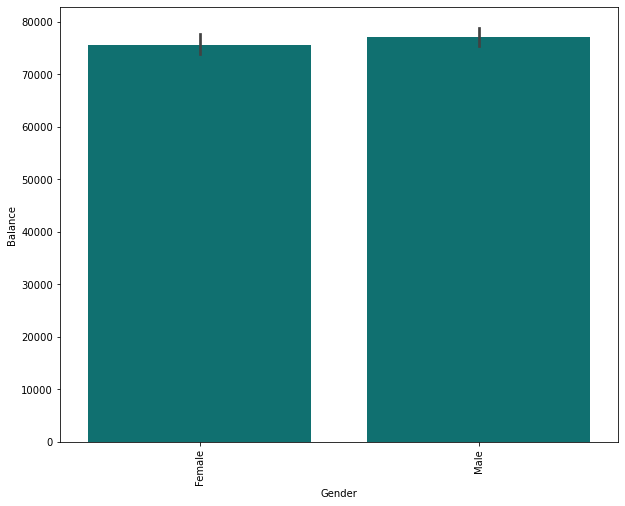

In [18]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90)
sns.barplot(x='Gender',y='Balance',color='teal',data=df);
# Visualizing barplot where Gender is taken on x axis and Balance is taken on y axis

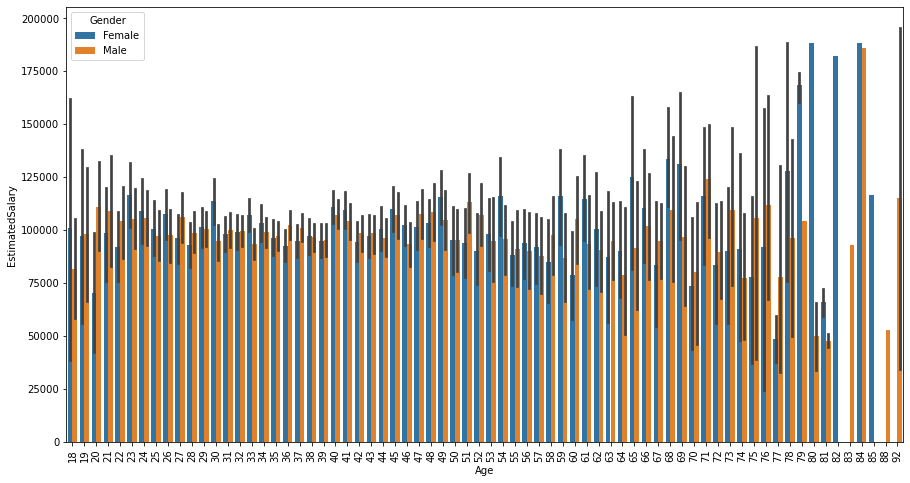

In [19]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='EstimatedSalary',hue='Gender',data=df);
# Visualizing barplot where Age is taken on x axis and EstimatedSalary is taken on y axis

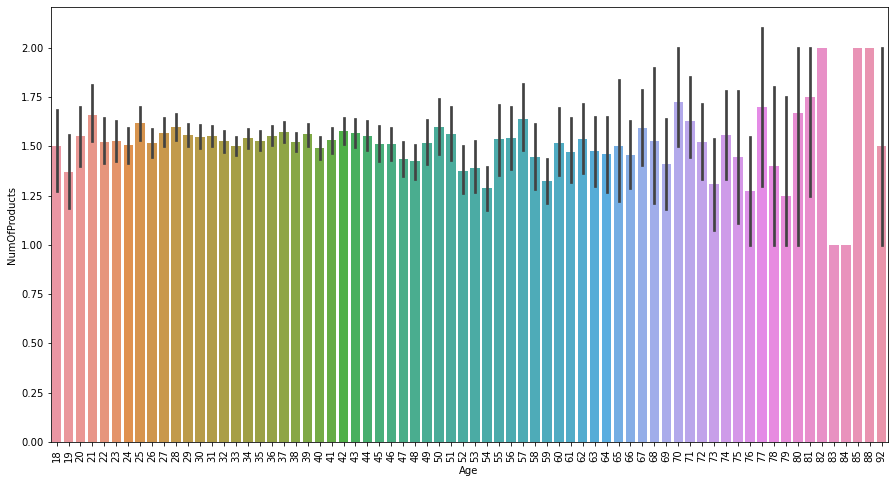

In [20]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='NumOfProducts',data=df);
# Visualizing barplot where Age is taken on x axis and NumOfProducts is taken on y axis

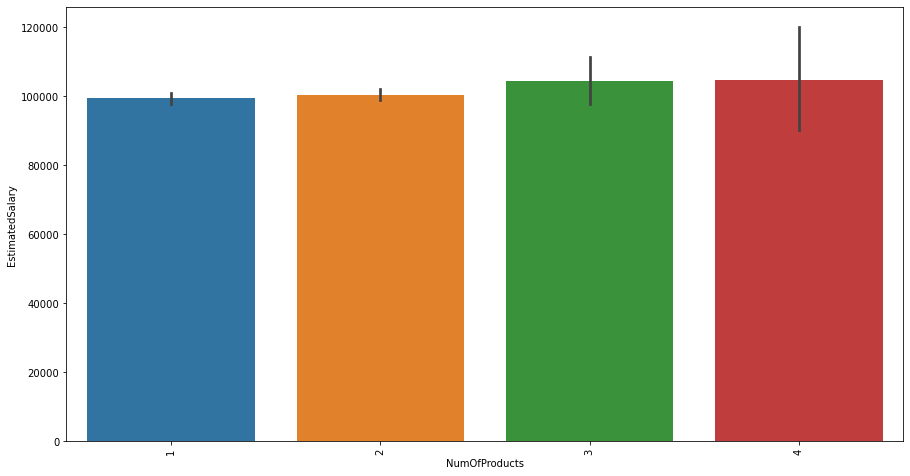

In [21]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='NumOfProducts',y='EstimatedSalary',data=df);
# Visualizing barplot where NumOfProducts is taken on x axis and EstimatedSalary is taken on y axis

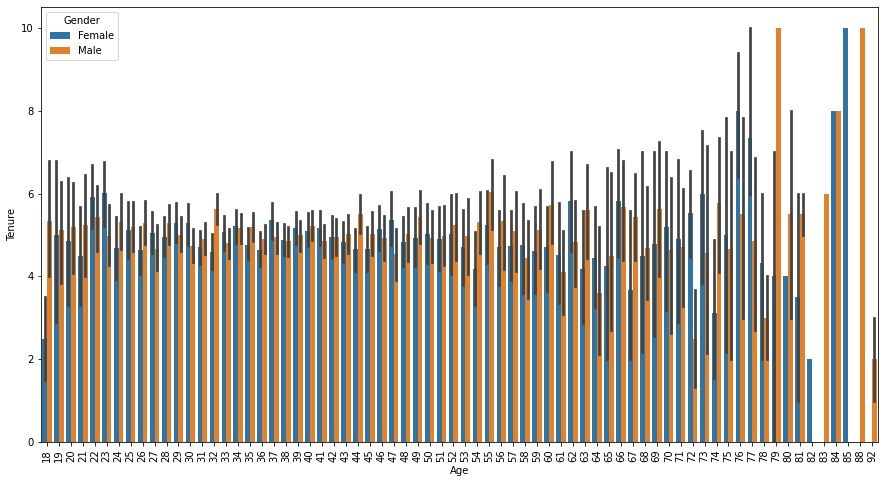

In [22]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='Age',y='Tenure',hue='Gender',data=df);
# Visualizing barplot where Age is taken on x axis and Tenure is taken on y axis and key is gender

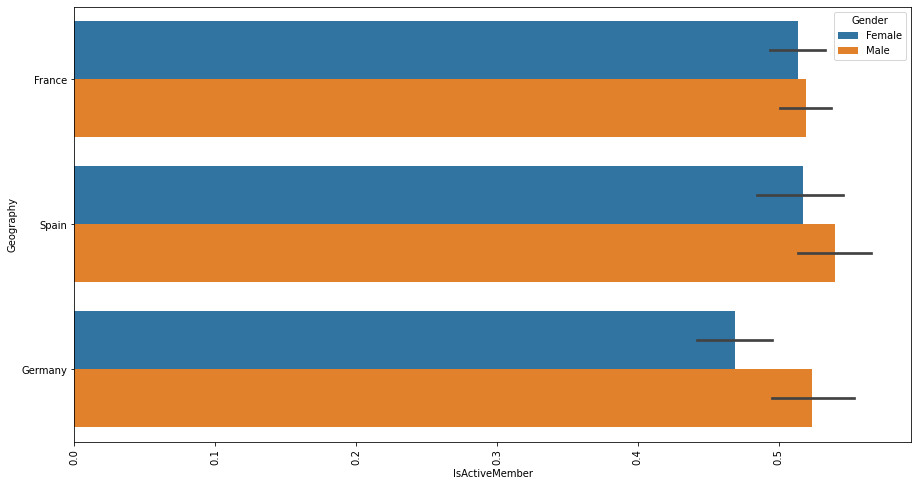

In [23]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='Geography',hue='Gender',data=df);
# Visualizing barplot where IsActiveMember is taken on x axis and Geography is taken on y axis and key is gender

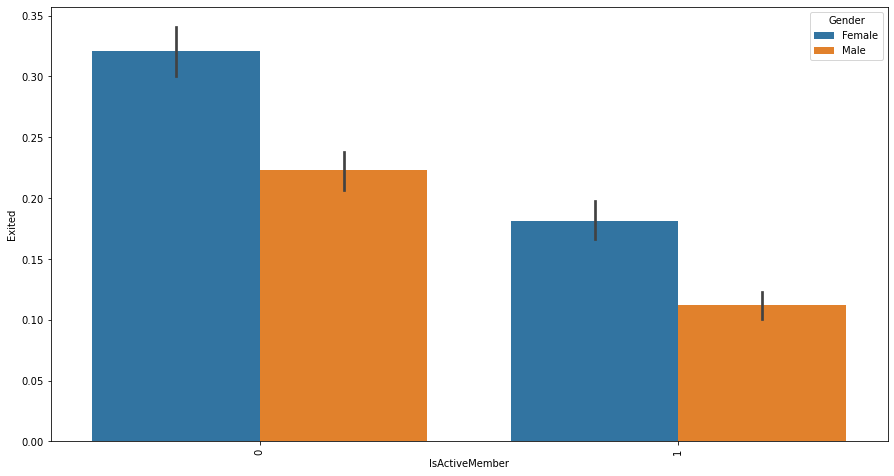

In [24]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='Exited',hue='Gender',data=df);
# Visualizing barplot where IsActiveMember is taken on x axis and Exited is taken on y axis and key is gender

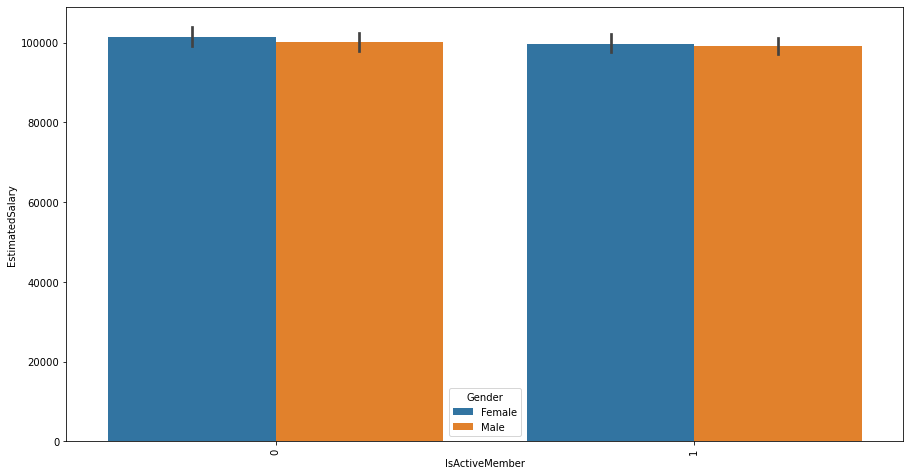

In [25]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='IsActiveMember',y='EstimatedSalary',hue='Gender',data=df);
# Visualizing barplot where IsActiveMember is taken on x axis and EstimatedSalary is taken on y axis and key is gender

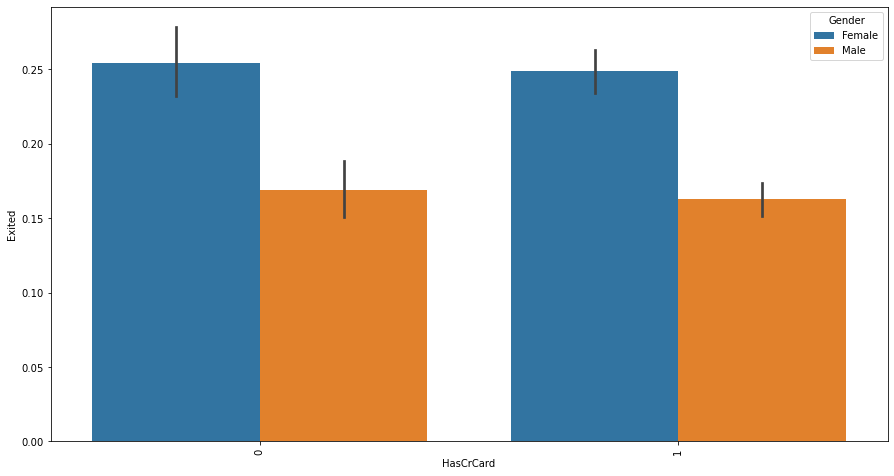

In [26]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='HasCrCard',y='Exited',hue='Gender',data=df); 
# Visualizing barplot where HasCrCard is taken on x axis and Exited is taken on y axis and key is gender

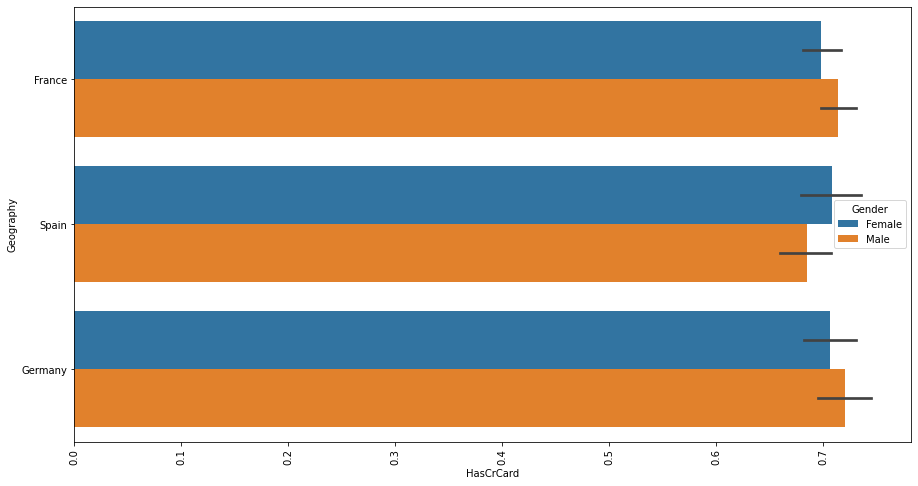

In [27]:
plt.figure(figsize=(15, 8))
plt.xticks(rotation=90)
sns.barplot(x='HasCrCard',y='Geography',hue='Gender',data=df);
# Visualizing barplot where HasCrCard is taken on x axis and Geography is taken on y axis and key is gender

## Label Encoding 

In [28]:
cat_cols=['Geography','Gender']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes    
# We convert categorical data into numeric data with the help of label encoding

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int32
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [29]:
df.keys()
# displaying columns 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [30]:
df.drop(['RowNumber'],axis=1,inplace=True)
df.drop(['CustomerId'],axis=1,inplace=True)
df.drop(['Surname'],axis=1,inplace=True)
# dropping uneccessary columns and removing them from the dataset 

## DistributionPlot 

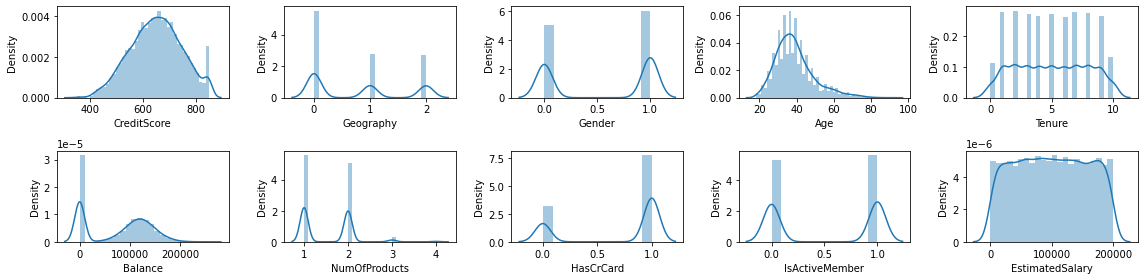

In [31]:
rows=2
cols=5
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1
        
plt.tight_layout()
# Distribution plot will help us to check if the data is skewed or not

In [32]:
X=df.drop(labels=['Exited'],axis=1)
Y=df['Exited']
X.head()
# Splitting data into dependent and independent columns

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [33]:
Y.head()
# This is the target column

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=40)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# Splitting the data set into training and testing data

(8000, 10) (2000, 10) (8000,) (2000,)


### Logistic Regression

In [35]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on train 
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds).sum(),'/',((Y_test == test_preds).sum()+(Y_test != test_preds).sum()))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds))

Model accuracy on train is:  0.788
Model accuracy on test is:  0.8
--------------------------------------------------
ROC score on train is:  0.5196539781240042
ROC score on test is:  0.519866439768977
--------------------------------------------------
confusion_matrix train is:  [[6201  146]
 [1550  103]]
confusion_matrix test is:  [[1575   41]
 [ 359   25]]
Wrong predictions out of total
--------------------------------------------------
400 / 2000
--------------------------------------------------
KappaScore is:  0.05806111299498873


### Naive Bayes Classifier

In [36]:
#fit the model on train data 
NB=GaussianNB()
NB.fit(X_train,Y_train)

#predict on train 
train_preds2 = NB.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = NB.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds2))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds2))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds2))

Model accuracy on train is:  0.781875
Model accuracy on test is:  0.7915
--------------------------------------------------
ROC score on train is:  0.5236234904696533
ROC score on test is:  0.5225479579207921
--------------------------------------------------
confusion_matrix train is:  [[6117  230]
 [1515  138]]
confusion_matrix test is:  [[1550   66]
 [ 351   33]]
Wrong predictions out of total
--------------------------------------------------
417 / 2000
--------------------------------------------------
KappaScore is:  0.0628876543875736


### Decision Tree Classifier

In [37]:
#fit the model on train data 
DT = DecisionTreeClassifier().fit(X,Y)

#predict on train 
train_preds3 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds3))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds3))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  1.0
--------------------------------------------------
ROC score on train is:  1.0
ROC score on test is:  1.0
--------------------------------------------------
confusion_matrix train is:  [[6347    0]
 [   0 1653]]
confusion_matrix test is:  [[1616    0]
 [   0  384]]
Wrong predictions out of total
--------------------------------------------------
0 / 2000
--------------------------------------------------
KappaScore is:  1.0


### Random Forest Classifier

In [38]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train 
train_preds4 = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds4))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds4))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds4))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.876
--------------------------------------------------
ROC score on train is:  1.0
ROC score on test is:  0.7336659447194719
--------------------------------------------------
confusion_matrix train is:  [[6347    0]
 [   0 1653]]
confusion_matrix test is:  [[1559   57]
 [ 191  193]]
Wrong predictions out of total
--------------------------------------------------
248 / 2000
--------------------------------------------------
KappaScore is:  0.5390334572490707


### K-Nearest Neighbours

In [39]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds5))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds5))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds5))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))

print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds5))

Model accuracy on train is:  0.8105
Model accuracy on test is:  0.7705
--------------------------------------------------
ROC score on train is:  0.5935625969407309
ROC score on test is:  0.5085602310231023
--------------------------------------------------
confusion_matrix train is:  [[6114  233]
 [1283  370]]
confusion_matrix test is:  [[1509  107]
 [ 352   32]]
Wrong predictions out of total
--------------------------------------------------
459 / 2000
--------------------------------------------------
KappaScore is:  0.022622353201710355


### Support Vector Machine

In [40]:
#fit the model on train data 
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train 
train_preds6 = SVM.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds6))

#predict on test
test_preds6 = SVM.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds6))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds6))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds6))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds6))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds6))
print('Wrong predictions out of total')
print('-'*50)

print("recall", metrics.recall_score(Y_test, test_preds6))
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds6).sum(),'/',((Y_test == test_preds6).sum()+(Y_test != test_preds6).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds6))

Model accuracy on train is:  0.778125
Model accuracy on test is:  0.788
--------------------------------------------------
ROC score on train is:  0.508956506215311
ROC score on test is:  0.5064846328382838
--------------------------------------------------
confusion_matrix train is:  [[6142  205]
 [1570   83]]
confusion_matrix test is:  [[1557   59]
 [ 365   19]]
Wrong predictions out of total
--------------------------------------------------
recall 0.049479166666666664
--------------------------------------------------
424 / 2000
--------------------------------------------------
KappaScore is:  0.018627559900751822


### XG-Boost Classifier

In [41]:
xgbr =xgb.XGBClassifier().fit(X_train, Y_train)

#predict on train 
train_preds7 = xgbr.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds7))

#predict on test
test_preds7 = xgbr.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds7))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds7))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds7))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds7))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds7))
print('Wrong predictions out of total')
print('-'*50)

print("recall", metrics.recall_score(Y_test, test_preds7))
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds7).sum(),'/',((Y_test == test_preds7).sum()+(Y_test != test_preds7).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds7))

[23:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model accuracy on train is:  0.957375
Model accuracy on test is:  0.867
--------------------------------------------------
ROC score on train is:  0.9046838082041132
ROC score on test is:  0.7469575082508251
--------------------------------------------------
confusion_matrix train is:  [[6312   35]
 [ 306 1347]]
confusion_matrix test is:  [[1522   94]
 [ 172  212]]
Wrong predictions out of total
--------------------------------------------------
recall 0.5520833333333334
--------------------------------------------------
266 / 2000
--------------------------------------------------
KappaScore is:  0.5353679327017131


In [42]:
# Random Forest Classifier and Xg-boost Regressor model performed well compared to other models

# Hyper Parameter Tuning

In [43]:
#fit the model on train data 
RFT=RandomForestClassifier(n_estimators=500,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',random_state=235,verbose=2,max_samples=50).fit(X_train,Y_train)
#predict on train 
train_preds8 = RFT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds8))

#predict on test
test_preds8 = RFT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds8))
print('-'*50)

#We got good accuracy which means our model is performing quite well 
#ROC 
print("ROC score on train is: ", roc_auc_score(Y_train, train_preds8))
print("ROC score on test is: ", roc_auc_score(Y_test, test_preds8))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds8))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds8))
print('Wrong predictions out of total')
print('-'*50)

# Wrong Predictions made.
print((Y_test !=test_preds8).sum(),'/',((Y_test == test_preds8).sum()+(Y_test != test_preds8).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,test_preds8))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500
building tree 447 of 500
building tree 448 of 500
building tree 449 of 500
building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Model accuracy on train is:  0.817375
Model accuracy on test is:  0.833
--------------------------------------------------
ROC score on train is:  0.5627739872818145
ROC score on test is:  0.5720529084158417
--------------------------------------------------
confusion_matrix train is:  [[6326   21]
 [1440  213]]
confusion_matrix test is:  [[1609    7]
 [ 327   57]]
Wrong predictions out of total
--------------------------------------------------
334 / 2000
--------------------------------------------------
KappaScore is:  0.21119256348246673


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


### A. RandomSearchCv

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 5000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 2000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [100, 644, 1188, 1733, 2277, 2822, 3366, 3911, 4455, 5000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 231, 452, 673, 894, 1115, 1336, 1557, 1778, 2000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [46]:
RFT1=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=RFT1,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 58.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 82.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 231, 452, 673, 894,
                                                      1115, 1336, 1557, 1778,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 644, 1188, 1733,
                                                         2277, 2822, 3366, 3911,
                                                         4455, 5000]},
                   random_state=100, verbose=2)

In [47]:
rf_randomcv.best_params_
# best parameters

{'n_estimators': 100,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 894,
 'criterion': 'entropy'}

In [48]:
rf_randomcv
# displaying all parameters

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 231, 452, 673, 894,
                                                      1115, 1336, 1557, 1778,
                                                      2000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 644, 1188, 1733,
                                                         2277, 2822, 3366, 3911,
                                                         4455, 5000]},
                   random_state=100, verbose=2)

In [49]:
rf_randomcv.best_estimator_
# Displaying best parameters from all parameters mentioned above

RandomForestClassifier(criterion='entropy', max_depth=894, max_features='sqrt',
                       min_samples_split=14)

In [50]:
best_random_grid=rf_randomcv.best_estimator_
# saving all parameters in best_random_grid

In [51]:
Y_pred=best_random_grid.predict(X_test)

print(confusion_matrix(Y_test,Y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,Y_pred)))

# Wrong Predictions made.
print((Y_test !=Y_pred).sum(),'/',((Y_test == Y_pred).sum()+(Y_test != Y_pred).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,Y_pred))
# predicting the randomised search cv models parameters and evaluating the random forest model using evaluation metrics

[[1561   55]
 [ 188  196]]
Accuracy Score 0.8785
243 / 2000
--------------------------------------------------
KappaScore is:  0.5488437031205906


### B. GridSearchCv

In [52]:
from sklearn.model_selection import GridSearchCV
# Using grid search cv model

In [53]:
rf_randomcv.best_params_
# Visualizing the best parameters of random cv

{'n_estimators': 100,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 894,
 'criterion': 'entropy'}

In [54]:
param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)
# creating a param_grid

{'criterion': ['entropy'], 'max_depth': [894], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [-100, 0, 100, 200, 300]}


In [55]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)
# Fitting the grid_search to the data

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  8.1min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [894],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [-100, 0, 100, 200, 300]},
             verbose=2)

In [56]:
grid_search.best_estimator_
# best parameters of grid search

RandomForestClassifier(criterion='entropy', max_depth=894, max_features='sqrt',
                       min_samples_split=14)

In [57]:
best_grid=grid_search.best_estimator_
# saving the parameters in best_grid

In [58]:
best_grid
# Displaying best_grid

RandomForestClassifier(criterion='entropy', max_depth=894, max_features='sqrt',
                       min_samples_split=14)

In [59]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))

# Wrong Predictions made.
print((Y_test !=y_pred).sum(),'/',((Y_test == y_pred).sum()+(Y_test != y_pred).sum()))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test,y_pred))
# Predicting the grid search cv on random forest model

[[1561   55]
 [ 191  193]]
Accuracy Score 0.877
246 / 2000
--------------------------------------------------
KappaScore is:  0.5417014427089544


#### The decision tree model showed us overfitting problem.
#### Hence the randomised search cv on random forest classifier gave us better accuracy which is 87 percent and wrong predictions made by the model are 243/2000 and grid search cv gave us 87 percent accuracy and wrong predictions are 246/2000. 